In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from IPython.display import Image

# What is Autoencoder?
Autoencoder is an unsupervised learning deep learning model normally used for dimensionally reduction.  
You can see the structue of Autoencoder below.

In [2]:
Image(url= "https://raw.githubusercontent.com/minsuk-heo/deeplearning/master/img/autoencoder1.png", width=500, height=250)

As you can see from above picture, the Autoencoder has compressed feature after encoder, this compressed feature normally used as low dimension vector for the input image.  
How do we get compressed vector?  
There is an encoder which transform the input data into low dimension and there is decoder which restores compressed data into original data.  The objective function of the Autoencoder is to minimize difference between input and output data.

# Autoencoder practice
We will practice dimensionality reduction with MNIST dataset using Autoencoder.

# collect MNIST data
you can collect MNIST data with below command.

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# preprocessing
We will use train data for Autoencoder train.  
For the effective data visualization, we only use 300 test data for visualization.

In [4]:
# we will use train data for auto encoder training
x_train = x_train.reshape(60000, 784)

# select only 300 test data for visualization
x_test = x_test[:300]
y_test = y_test[:300]
x_test = x_test.reshape(300, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize data
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

# Autoencoder architecture
we will implement tensorflow autoencoder according to below architecture.

In [5]:
Image(url= "https://raw.githubusercontent.com/minsuk-heo/deeplearning/master/img/autoencoder2.png", width=500, height=250)

# Tensorflow model
Below code will generate tensorflow autoencoder.  
Loss function is to minimize difference between input and output.

In [6]:
# input
_input = tf.placeholder(tf.float32, [None, 28*28])    # value in the range of (0, 1)
# encoder
encoder = tf.layers.dense(_input, 128, tf.nn.tanh)
# bottleneck
bottleneck = tf.layers.dense(encoder, 3)
# decoder
decoder = tf.layers.dense(bottleneck, 128, tf.nn.tanh)
#output
_output = tf.layers.dense(decoder, 28*28, tf.nn.sigmoid)
# loss function
loss = tf.losses.mean_squared_error(labels=_input, predictions=_output)
# optimizor
train = tf.train.AdamOptimizer(0.002).minimize(loss)

# Training

In [7]:
# initialize
init = tf.global_variables_initializer()

# train hyperparameters
epoch_cnt = 50
batch_size = 5000
iteration = len(x_train) // batch_size

# Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)
    print("train start...")
    for epoch in range(epoch_cnt):
        avg_loss = 0.0
        start = 0; end = batch_size
        for i in range(iteration):
            _, loss_ = sess.run([train, loss], 
                               feed_dict={_input: x_train[start: end]})
            start += batch_size; end += batch_size
            # Compute average loss
            avg_loss += loss_ / iteration
        print("epoch : "+str(epoch)+ " , train loss : "+str(avg_loss))
    # take compressed vector
    _bottleneck = sess.run(bottleneck, {_input: x_test})

train start...
epoch : 0 , train loss : 0.14656024177869156
epoch : 1 , train loss : 0.07015074727435908
epoch : 2 , train loss : 0.06727034598588943
epoch : 3 , train loss : 0.06517438093821207
epoch : 4 , train loss : 0.06341770074019829
epoch : 5 , train loss : 0.06260194194813569
epoch : 6 , train loss : 0.061735552735626704
epoch : 7 , train loss : 0.06030507137378058
epoch : 8 , train loss : 0.058687358163297176
epoch : 9 , train loss : 0.05758731470753749
epoch : 10 , train loss : 0.05670962110161781
epoch : 11 , train loss : 0.05591639876365662
epoch : 12 , train loss : 0.05516786469767491
epoch : 13 , train loss : 0.05449143424630166
epoch : 14 , train loss : 0.05388984798143307
epoch : 15 , train loss : 0.05335160531103611
epoch : 16 , train loss : 0.05286022648215294
epoch : 17 , train loss : 0.05240394112964471
epoch : 18 , train loss : 0.051977147348225124
epoch : 19 , train loss : 0.05156791334350904
epoch : 20 , train loss : 0.0511713515346249
epoch : 21 , train loss : 0

# data visualization
Let's visualize the compressed latent vector at 3d chart.

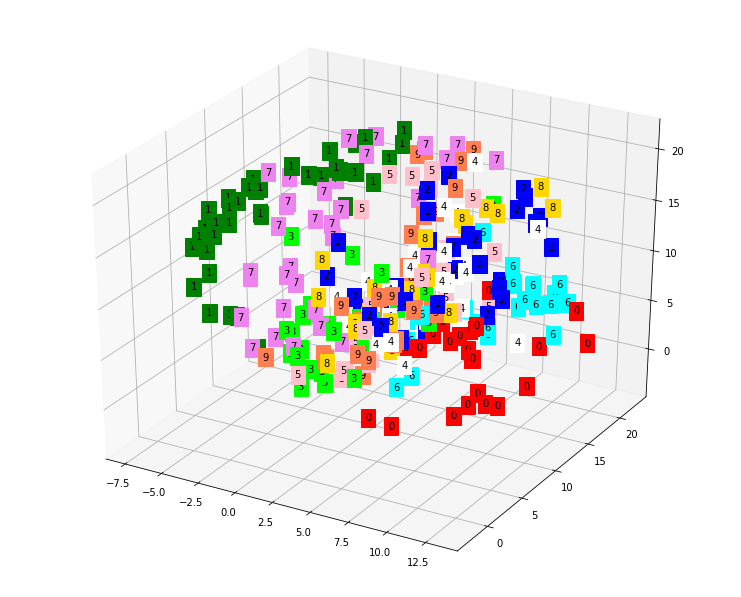

In [8]:
# visualize in 3D plot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

fig = plt.figure(1)
ax = Axes3D(fig)

xs = _bottleneck[:, 0]
ys = _bottleneck[:, 1]
zs = _bottleneck[:, 2]

color=['red','green','blue','lime','white','pink','aqua','violet','gold','coral']

for x, y, z, label in zip(xs, ys, zs, y_test):
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor=c)
    
ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())

plt.show()

As you can see, we visualized MNIST hand written data in 3d chart using Autoencoder!